# Classification of samples: benign or malignant, using Support Vector Machines (SVM) #

### Summary ###
1. Import Libraries
Import essential libraries for data manipulation and visualization, such as pandas, numpy, and matplotlib.
Import libraries specific to machine learning, including sklearn modules for model training, evaluation, and preprocessing.
2. Load Dataset
Use pandas to load the dataset into a DataFrame, either from a local file or a URL. In this case, from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

3. Inspect the first few rows of the DataFrame using df.head() to understand the data structure.

4. Explore the Dataset
Use df.info() to check the data types and look for missing values.
Generate summary statistics with df.describe() to understand feature distributions and identify any outliers.

5. Preprocess the Data
Handle any missing values through imputation or removal as necessary.
Standardize the feature values using StandardScaler to ensure they are on a similar scale, which is crucial for SVM performance.

6. Split the Data
Use train_test_split from sklearn to randomly split the dataset into training and testing sets.
Define the proportion of data to be used for testing (commonly 20% to 30%).

7. Train the SVM Model
Initialize an SVM model using SVC() from sklearn, choosing an appropriate kernel (e.g., linear, RBF).
Fit the model on the training data using the fit() method.

8. Make Predictions
Use the trained model to predict labels for the test set with the predict() method.
Store the predicted labels for evaluation.

9. Evaluate the Model
Generate a confusion matrix to see how many predictions were correct versus incorrect.
Create a classification report to evaluate precision, recall, and F1-score for each class.

10. Tune the SVM Model (Optional)
Use GridSearchCV to explore different hyperparameters (e.g., C, gamma, kernel types) for model optimization.
Fit the grid search on the training data and select the best parameters based on cross-validation performance.

11. Visualize the Results (Optional)
If the dataset is 3D, create a scatter plot of the test data colored by the actual labels.
Overlay the SVM decision boundary to visualize how the model separates the classes.

12. Save the Model (Optional)
Use joblib or pickle to save the trained SVM model to a file for future use.
Provide a file path and filename for easy access later.


### Import Libraries ###

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


### Load Dataset ###

In [105]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076

## Exploratory Data Analysis EAD ##

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign target =1 , 212 malignant target = 0

In [106]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [107]:
#The dataset includes 30 features related to the characteristics of the cell nuclei
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


### Pair Plot (For relationships between all features) ###
Seaborn’s pairplot is excellent for visualizing relationships between multiple variables at once, especially in small datasets.

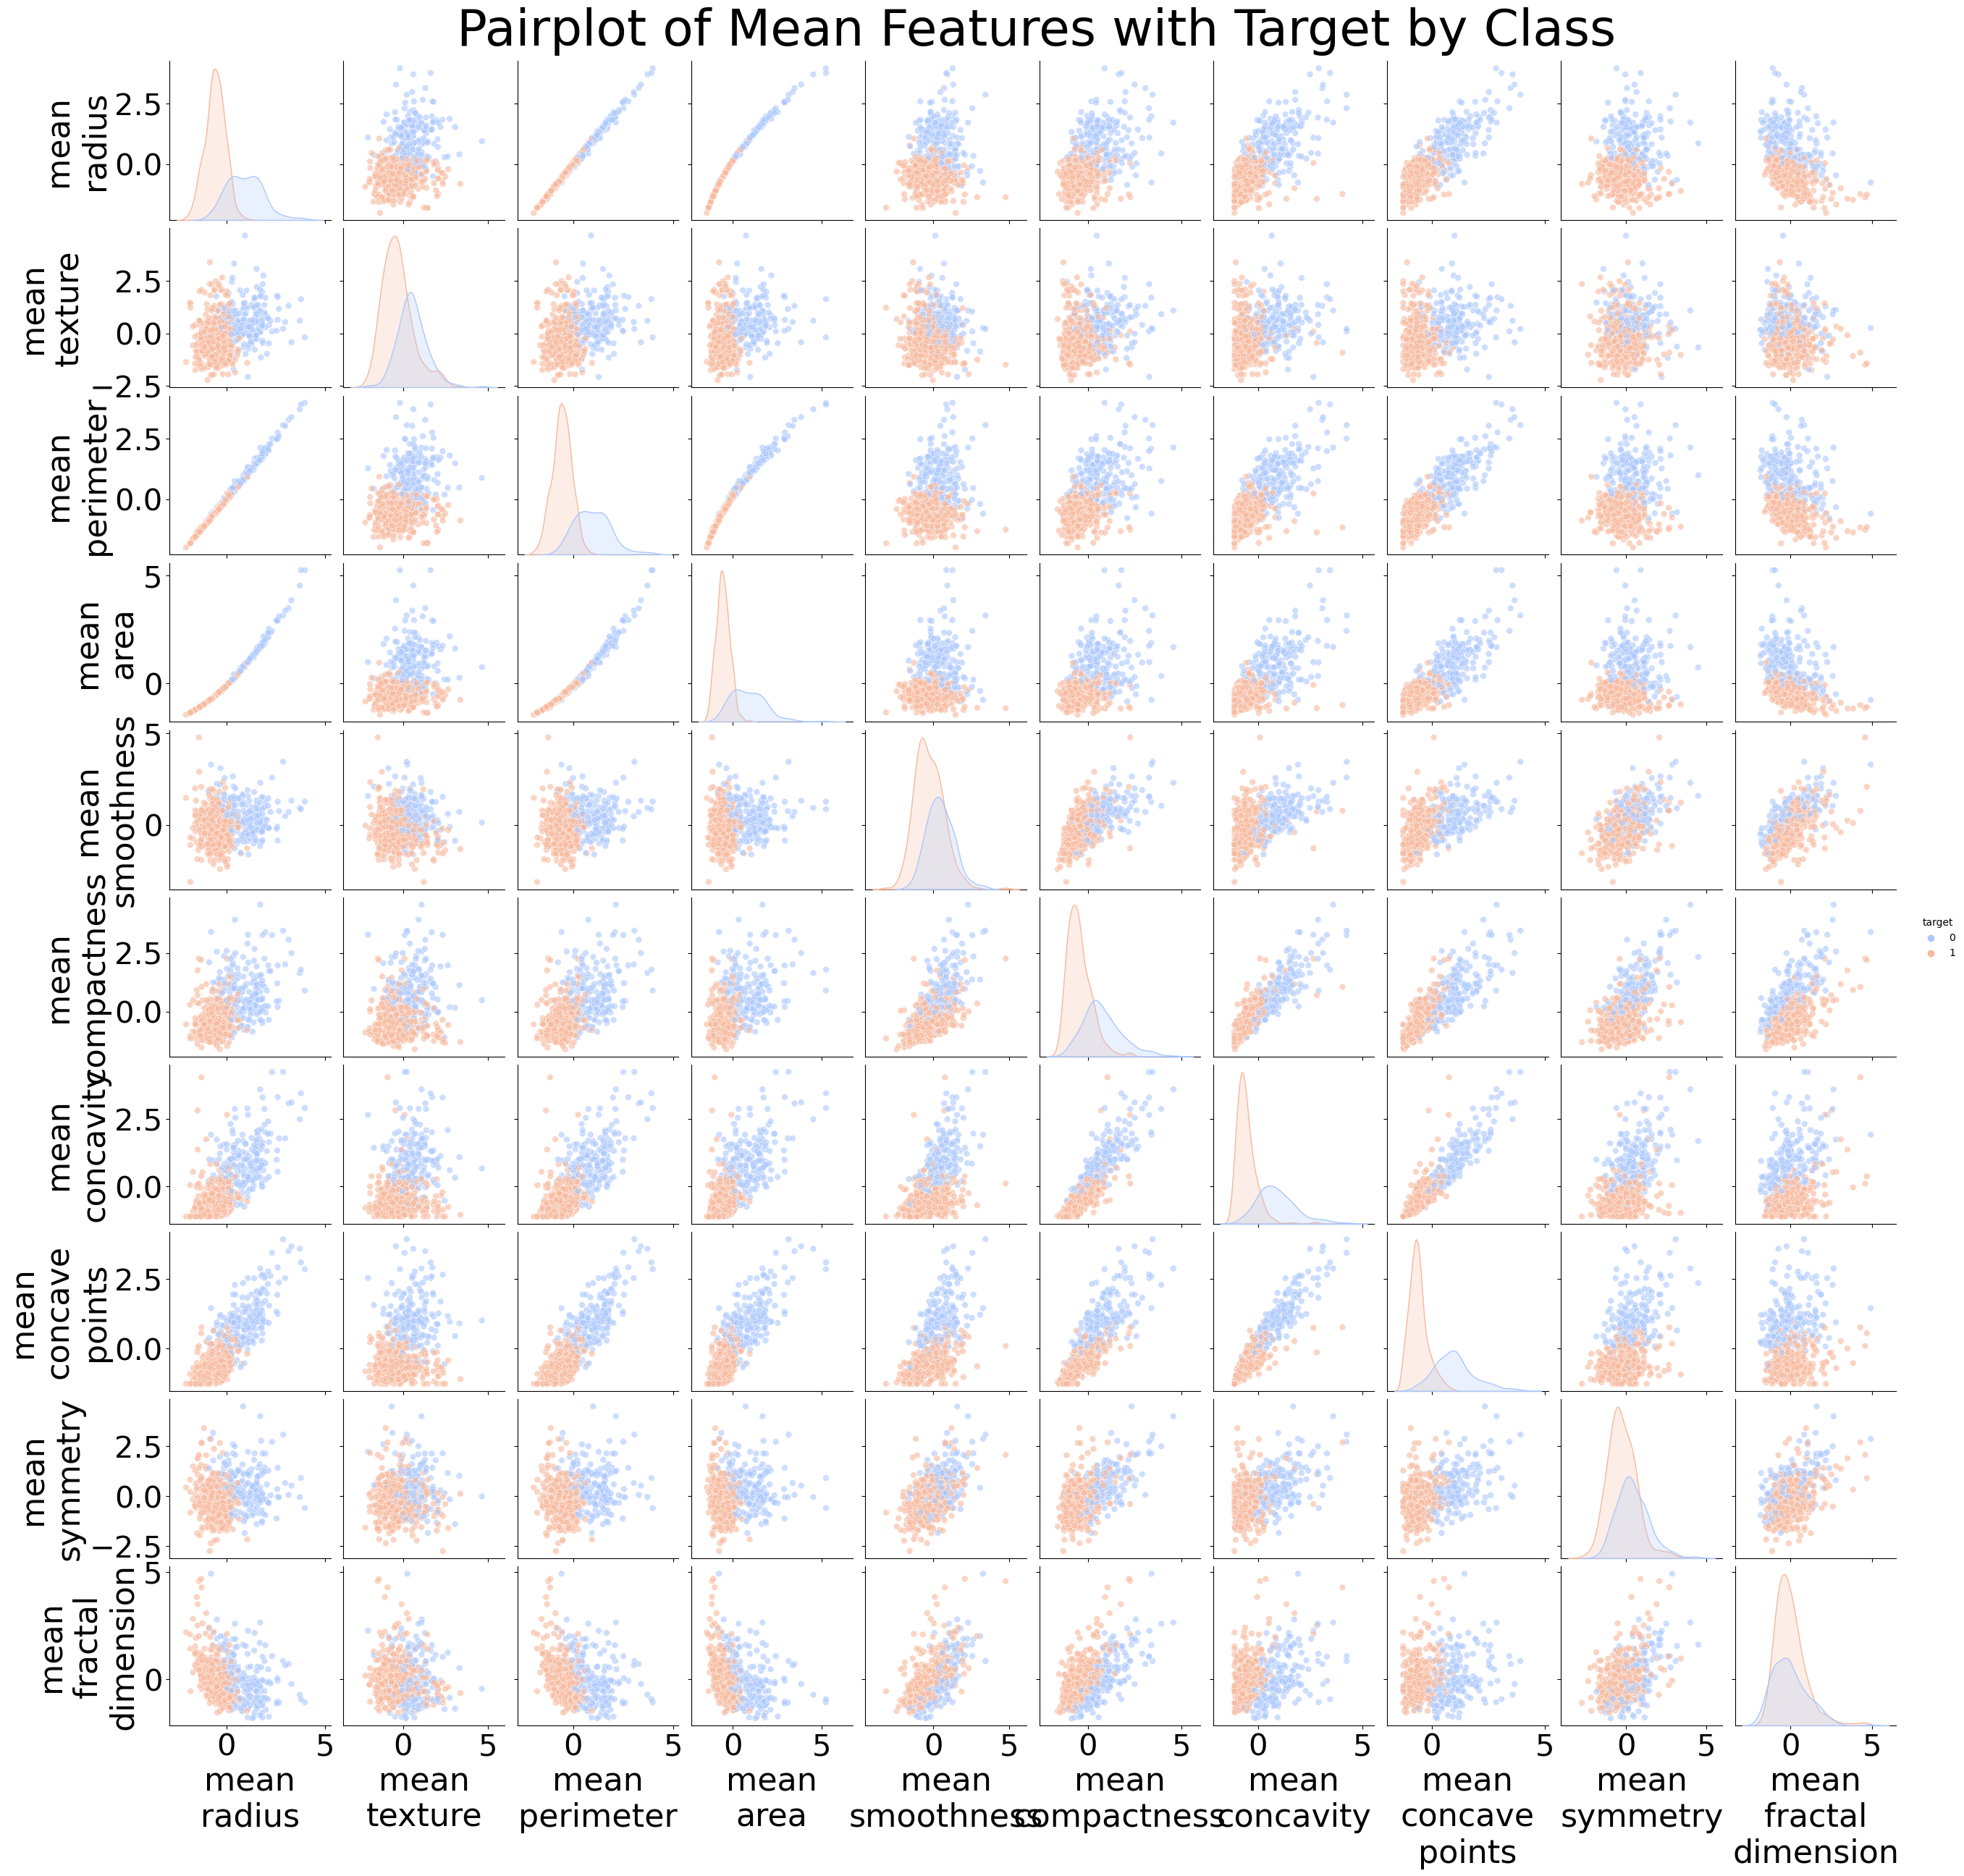

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct column names for the 'mean' features
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
            'mean smoothness', 'mean compactness', 'mean concavity', 
            'mean concave points', 'mean symmetry', 'mean fractal dimension']

# Create a Seaborn pairplot with the correct features and target
g = sns.pairplot(df[features + ['target']], diag_kind='kde', hue='target', palette="coolwarm",
                 plot_kws={'alpha': 0.6, 's': 40}, diag_kws={'fill': True})  # Replacing 'shade' with 'fill'

# Break long axis labels into two lines and adjust font sizes
for ax in g.axes.flat:
    ax.set_xlabel("\n".join(ax.get_xlabel().split()), fontsize=32)  # Split the x-axis label into multiple lines
    ax.set_ylabel("\n".join(ax.get_ylabel().split()), fontsize=32)  # Split the y-axis label into multiple lines
    ax.tick_params(axis='both', which='major', labelsize=30)  # Set tick labels font size

# Add a title for clarity
plt.suptitle('Pairplot of Mean Features with Target by Class', size=50)
plt.subplots_adjust(top=0.95)

# Show the plot
plt.show()


Blue to benign (0)
Orange to malignant (1)

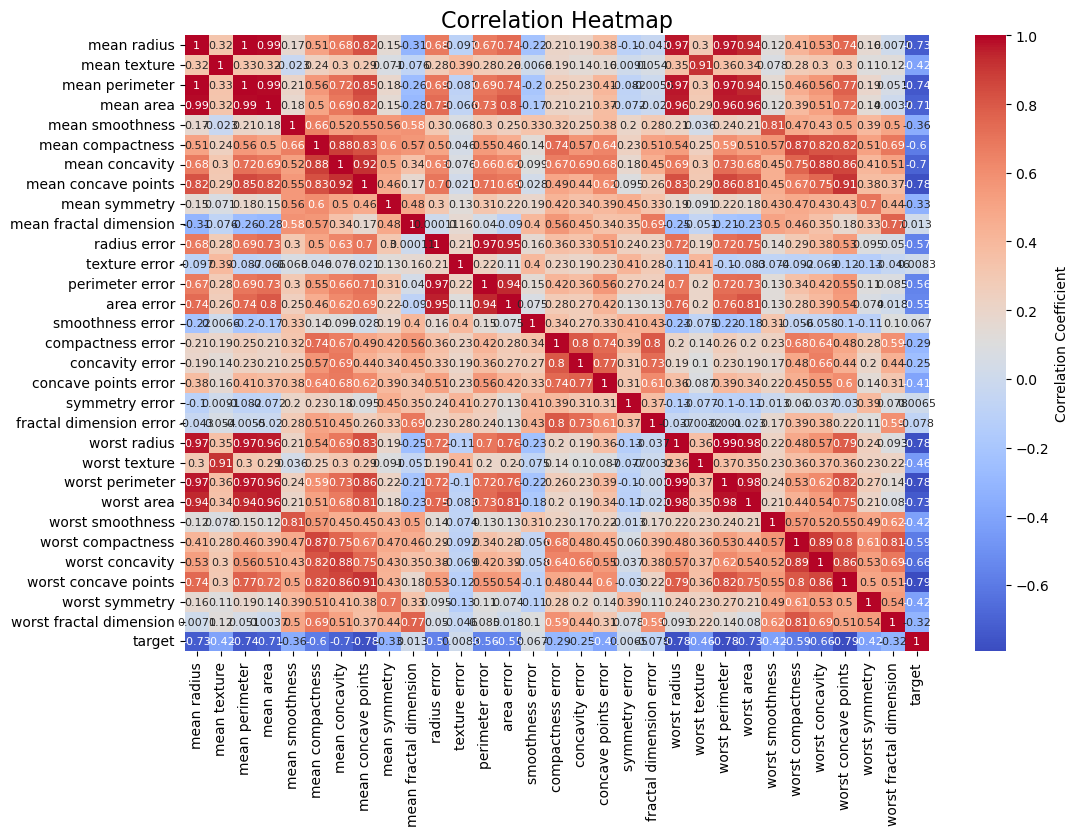

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap with smaller labels
plt.figure(figsize=(12, 8))  # Optional: Adjust figure size for better visibility
sns.heatmap(corr, annot=True, cmap='coolwarm', 
            annot_kws={"size": 8},  # Size of the annotations
            xticklabels=1,  # Frequency of x-tick labels (1 means show every label)
            yticklabels=1,  # Frequency of y-tick labels (1 means show every label)
            cbar_kws={'label': 'Correlation Coefficient'})  # Color bar label

# Add a title
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


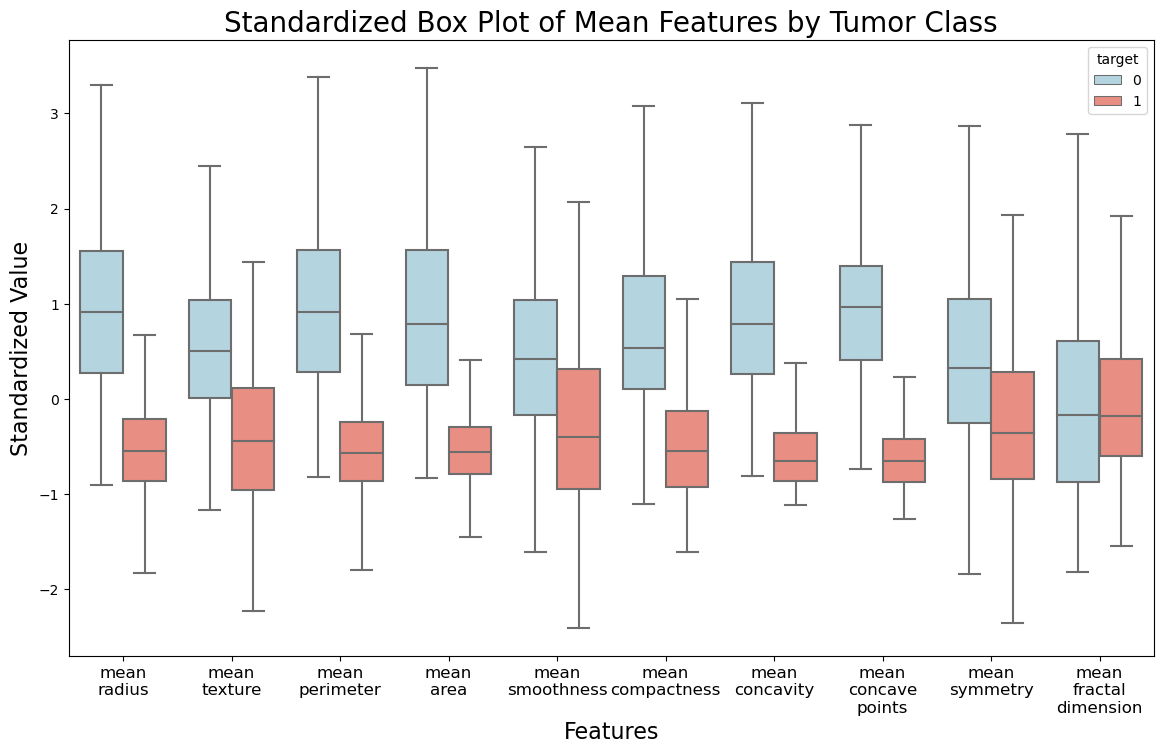

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Define the features to plot
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
            'mean smoothness', 'mean compactness', 'mean concavity', 
            'mean concave points', 'mean symmetry', 'mean fractal dimension']

# Standardize the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Melt the DataFrame to long format
df_melted = df.melt(id_vars='target', value_vars=features, var_name='Feature', value_name='Value')

# Create the box plot
plt.figure(figsize=(14, 8))
box_plot = sns.boxplot(data=df_melted, x='Feature', y='Value', hue='target', 
                       palette={0: "lightblue", 1: "salmon"}, showfliers=False)

# Add title and labels
plt.title('Standardized Box Plot of Mean Features by Tumor Class', fontsize=20)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Standardized Value', fontsize=16)

# Adjust x-axis label size and format to prevent overlap
plt.xticks(ticks=range(len(features)), labels=[feature.replace(" ", "\n") for feature in features], fontsize=12)


# Show the plot
plt.show()


In [109]:
df.describe()  # Summary statistics

mean radius  mean texture  mean perimeter     mean area  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -3.162867e-15 -6.530609e-15   -7.078891e-16 -8.799835e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean      6.132177e-15     -1.120369e-15   -4.421380e-16         9.732500e-16   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01        -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01        -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01         6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00         3.927930e+00   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count   5.690000e+02            5.690000e+02  ...     569.000000   
mean   -1.971670e-15           -1.453631e-15  ...      25.677223   
std     1.000880e+00            1.000880e+00  ...       6.146258   
min    -2.744117e+00           -1.819865e+00  ...      12.020000   
25%    -7.032397e-01           -7.226392e-01  ...      21.080000   
50%    -7.162650e-02           -1.782793e-01  ...      25.410000   
75%     5.307792e-01            4.709834e-01  ...      29.720000   
max     4.484751e+00            4.910919e+00  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [110]:
df.info()  # Overview of the data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [111]:
df['target'].value_counts()  # Check the distribution of target labels

1    357
0    212
Name: target, dtype: int64

### 4. Preprocess the Data: Handle Missing Values, Scale the Features (SVM performs better with standardized features) ###

In [112]:
df.isnull().sum()  # Check for missing values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [113]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


5. Split the Data

In [114]:
# Assuming df is your DataFrame with the selected features and target
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 
                    'mean area', 'mean concavity', 'mean compactness', 
                    'worst radius']

X = df[selected_features].values
y = df['target'].values

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check shapes again after scaling
print("X_scaled shape:", X_scaled.shape)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X shape: (569, 7)
y shape: (569,)
X_scaled shape: (569, 7)
X_train: (455, 7)
X_test: (114, 7)


In [115]:
print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)


X_scaled shape: (569, 7)
y shape: (569,)


6.  Train the SVM Model

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [117]:
model = SVC(kernel='linear')  # Linear kernel
model.fit(X_train, y_train)  # Train the model

SVC(kernel='linear')

7. Make Predictions

In [61]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

8. Evaluate the Model

In [130]:

print(confusion_matrix(y_test, y_pred))  # Confusion matrix

[[41  2]
 [ 3 68]]


## Confusion Matrix Elements

The confusion matrix provides insight into the performance of a classification model by summarizing the counts of true and false predictions. Each element in the matrix is defined as follows:

|                         | **Predicted Negative (0)** | **Predicted Positive (1)** |
|-------------------------|-----------------------------|-----------------------------|
| **Actual Negative (0)** | True Negative (TN) = 41     | False Positive (FP) = 2     |
| **Actual Positive (1)** | False Negative (FN) = 3     | True Positive (TP) = 68     |

### Definitions of Each Element

- **True Negative (TN)**:  
  The model correctly predicted the negative class.  
  **Value**: 41

- **False Positive (FP)**:  
  The model incorrectly predicted the positive class when it was actually negative.  
  **Value**: 2

- **False Negative (FN)**:  
  The model incorrectly predicted the negative class when it was actually positive.  
  **Value**: 3

- **True Positive (TP)**:  
  The model correctly predicted the positive class.  
  **Value**: 68



 ### Confusion Matrix Heatmap:  ###

Visualize the confusion matrix to see how many predictions fall into each category.

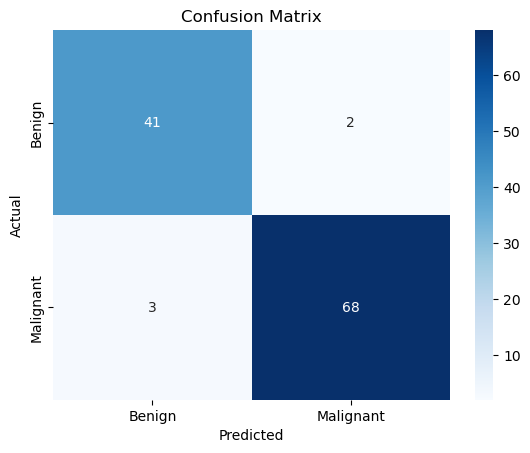

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


 
 ##  Classification Report ##

The classification report provides key performance metrics for the model's predictions.






In [131]:

print(classification_report(y_test, y_pred))  # Precision, recall, F1-score


              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# Confusion Matrix

|                                   | **Predicted Negative (0)** | **Predicted Positive (1)** |
|-----------------------------------|-----------------------------|-----------------------------|
| **Actual Negative (0)**           | True Negative (TN) = 41     | False Positive (FP) = 2      |
| **Actual Positive (1)**           | False Negative (FN) = 3     | True Positive (TP) = 68      |

---

## Per-Class Metrics

### Class 0 (Negative Class)
- **Precision**: 
  - **Value**: 0.93
  - **Definition**: The proportion of positive identifications that were actually correct.
  - **Formula**:  
    $$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{41}{41 + 2} \approx 0.93$$
  
- **Recall**: 
  - **Value**: 0.95
  - **Definition**: The proportion of actual positives that were identified correctly.
  - **Formula**:  
    $$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{41}{41 + 3} \approx 0.95$$
  
- **F1-Score**: 
  - **Value**: 0.94
  - **Definition**: The harmonic mean of precision and recall, balancing both metrics.
  - **Formula**:  
    $$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.93 \times 0.95}{0.93 + 0.95} \approx 0.94$$
  
- **Support**: 
  - **Definition**: The number of actual occurrences of the class in the dataset.
  - **Value**: 43

---

### Class 1 (Positive Class)
- **Precision**: 
  - **Value**: 0.97
  - **Definition**: The proportion of positive identifications that were actually correct.
  - **Formula**:  
    $$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{68}{68 + 2} \approx 0.97$$
  
- **Recall**: 
  - **Value**: 0.96
  - **Definition**: The proportion of actual positives that were identified correctly.
  - **Formula**:  
    $$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{68}{68 + 3} \approx 0.96$$
  
- **F1-Score**: 
  - **Value**: 0.96
  - **Definition**: The harmonic mean of precision and recall, balancing both metrics.
  - **Formula**:  
    $$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.97 \times 0.96}{0.97 + 0.96} \approx 0.96$$
  
- **Support**: 
  - **Definition**: The number of actual occurrences of the class in the dataset.
  - **Value**: 71

---

## Overall Metrics

- **Accuracy**: 
  - **Value**: 0.96
  - **Definition**: The proportion of total correct predictions made by the model.
  - **Formula**:  
    $$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{Total}} = \frac{41 + 68}{41 + 2 + 3 + 68} = \frac{109}{114} \approx 0.96$$

---

## Average Metrics

### Macro Average (macro avg)
- **Definition**: Unweighted average of precision, recall, and F1-score across all classes.
- **Values**:  
  - **Macro Precision**: 0.95  
  - **Macro Recall**: 0.96  
  - **Macro F1-Score**: 0.95  

### Weighted Average (weighted avg)
- **Definition**: Average weighted by the number of instances (support) in each class.
- **Values**:  
  - **Weighted Precision**: 0.96  
  - **Weighted Recall**: 0.96  
  - **Weighted F1-Score**: 0.96  





## Plot the decision boundary (hyperplane) along with the support vectors. ##

In [23]:
#Select Features and Target Variable
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


selected_features = ['mean radius', 'mean texture', 'mean area']
X = df[selected_features].values  # Select the feature columns
y = df['target'].values            # 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)



SVC(probability=True)

In [26]:
!pip install plotly

Looking in indexes: https://packagemanager.posit.co/pypi/latest/simple


In [36]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load your dataset (replace with your actual data)
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Select the features of interest
X = df[['mean radius', 'mean texture', 'mean smoothness']].values
y = df['target'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# Prepare data for Plotly
train_df = pd.DataFrame(X_train_scaled, columns=['Mean Radius', 'Mean Texture', 'Mean Smoothness'])
train_df['Target'] = y_train

test_df = pd.DataFrame(X_test_scaled, columns=['Mean Radius', 'Mean Texture', 'Mean Smoothness'])
test_df['Target'] = y_test

# Create a mesh grid for hyperplane visualization
xx, yy = np.meshgrid(np.linspace(train_df['Mean Radius'].min(), train_df['Mean Radius'].max(), 100),
                     np.linspace(train_df['Mean Texture'].min(), train_df['Mean Texture'].max(), 100))

# Calculate Z values based on the SVM decision function
Z = -(model.coef_[0][0] * xx + model.intercept_[0]) / model.coef_[0][1]

# Define a new data point (example: benign)
new_data_point = np.array([[12.0, 20.0, 0.1]])  # Adjust these values as needed
new_data_point_scaled = scaler.transform(new_data_point)

# Create an interactive 3D scatter plot
fig = go.Figure()

# Add training points
fig.add_trace(go.Scatter3d(
    x=train_df['Mean Radius'],
    y=train_df['Mean Texture'],
    z=train_df['Mean Smoothness'],
    mode='markers',
    marker=dict(size=5, color=train_df['Target'], colorscale='Viridis', opacity=0.8),
    name='Training Points'
))

# Add test points
fig.add_trace(go.Scatter3d(
    x=test_df['Mean Radius'],
    y=test_df['Mean Texture'],
    z=test_df['Mean Smoothness'],
    mode='markers',
    marker=dict(size=5, color='black', symbol='cross'),
    name='Test Points'
))

# Add hyperplane
fig.add_trace(go.Surface(
    z=Z,
    x=xx,
    y=yy,
    opacity=0.5,
    colorscale='YlGnBu',
    name='Hyperplane',
    showscale=False
))

# Add new data point as a large green marker
fig.add_trace(go.Scatter3d(
    x=[new_data_point_scaled[0, 0]],
    y=[new_data_point_scaled[0, 1]],
    z=[new_data_point_scaled[0, 2]],  # Use the third feature
    mode='markers',
    marker=dict(size=15, color='green', symbol='circle'),
    name='New Data Point (Benign)'
))

# Add hyperplane info as annotations
hyperplane_info = f"Hyperplane Equation:\n{model.coef_[0][0]:.2f} * x + {model.coef_[0][1]:.2f} * y + {model.intercept_[0]:.2f} = 0"
fig.add_annotation(
    text=hyperplane_info,
    xref='paper', yref='paper',
    x=0.5, y=0.95,
    showarrow=False,
    font=dict(size=14, color="black"),
    bgcolor="lightgray",
    bordercolor="black",
    borderwidth=1,
    borderpad=4,
)

# Update layout for better visibility
fig.update_layout(
    scene=dict(
        xaxis_title='Mean Radius',
        yaxis_title='Mean Texture',
        zaxis_title='Mean Smoothness',
        aspectmode='cube'
    ),
    width=800,
    height=800,
    title='SVM Hyperplane Visualization with New Data Point',
)

# Show the figure
fig.show()


In [37]:
fig.write_html("3D_visualization.html")

The Receiver Operating Characteristic (ROC) curve is a graphical representation of a classification model's performance across different threshold levels. 

It plots the True Positive Rate (TPR), also known as sensitivity, against the False Positive Rate (FPR) at various thresholds. 


The TPR indicates the proportion of actual positive cases correctly identified, while the FPR shows the proportion of actual negative cases incorrectly classified as positive.

A key outcome of the ROC curve is the Area Under the Curve (AUC), which quantifies the overall ability of the model to discriminate between positive and negative classes; an AUC of 1 indicates perfect classification, while an AUC of 0.5 suggests no discriminative power. 


In summary, the ROC curve helps to evaluate how well a model distinguishes between different classes and is especially useful when dealing with imbalanced datasets.

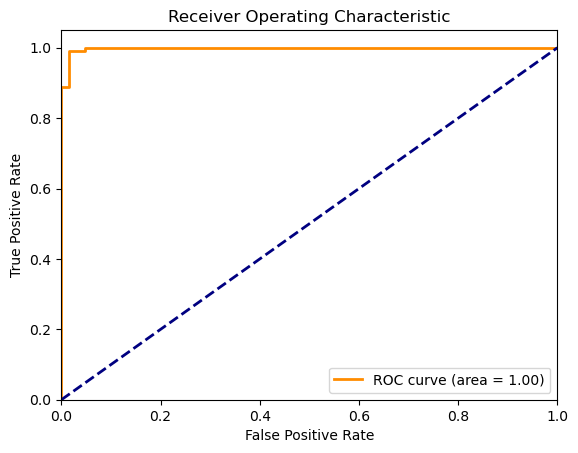

In [93]:

from sklearn.metrics import roc_curve, auc



# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [96]:
print("AUC value:", roc_auc)

AUC value: 0.9979423868312757


This value indicates the model's performance in distinguishing between benign and malignant tumors. An AUC of 1 means perfect classification, while an AUC of 0.5 means the model performs no better than random guessing.


Near Perfect Classification: An AUC of 0.99 indicates that the model correctly classifies 99% of the positive (malignant) and negative (benign) cases across various thresholds.

Low False Positive Rate: The model achieves a very low rate of false positives, meaning it rarely misclassifies benign cases as malignant.

High Sensitivity: The model demonstrates high sensitivity, correctly identifying almost all actual malignant cases.

Robust Performance: AUC values close to 1 suggest that the model performs robustly, making it a reliable tool for predicting tumor classification.

Real-World Implications: In practical terms, this model would be very effective in a clinical setting for helping to diagnose cancer, as it minimizes the risk of misdiagnosis.